# Import required Libraries

In [66]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import pandas as pd
import os

# Set the environments

In [2]:
%matplotlib inline

In [81]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load the Files

In [28]:
audio_files=['a1.wav','a2.wav','a3.wav','a4.wav','a5.wav',
            'b1.wav','b2.wav','b3.wav','b4.wav','b5.wav',
            'c1.wav','c2.wav','c3.wav','c4.wav','c5.wav']
audio_filepaths=['./data/sample15/'+x for x in audio_files]

## Analyze one File

In [43]:
x,sr = librosa.load(audio_filepaths[6], sr=44100)

In [44]:
len(x)

110250

### 0.Regular Wave Plot

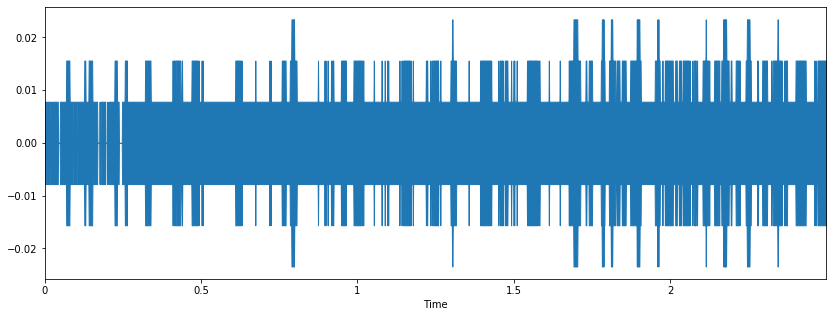

In [45]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### 1. Spectral Centroid

216
[0.84891825 0.79832231 0.89089183 0.7480849  0.88013524 0.87497382
 0.54266345 0.54154663 0.6856935  0.85351435 0.74257029 0.64696043
 0.22357099 0.27146476 0.72231697 0.97622676 1.         0.98948202
 0.72209468 0.60317401 0.41081138 0.60079454 0.44217798 0.66135376
 0.97471363 0.95511168 0.73517682 0.45712697 0.36723503 0.40511174
 0.67782198 0.91920302 0.88752587 0.92232023 0.65026267 0.52163156
 0.45549524 0.45843147 0.43708005 0.52674229 0.53513288 0.23452275
 0.28241855 0.47286174 0.55386418 0.53631498 0.485148   0.58328219
 0.74258322 0.70537448 0.64390889 0.71187838 0.52502955 0.38555498
 0.39617602 0.61446251 0.65651623 0.61276999 0.56988802 0.60890413
 0.61067883 0.50637067 0.49113064 0.64671407 0.80276326 0.50388374
 0.3593248  0.28091056 0.05336106 0.15212052 0.44351554 0.64206884
 0.64286793 0.607889   0.57543661 0.59315362 0.58718365 0.5841763
 0.58750229 0.49255641 0.47449915 0.47858963 0.4885394  0.48483173
 0.55464998 0.54152458 0.57960587 0.53960603 0.45135452 0.5

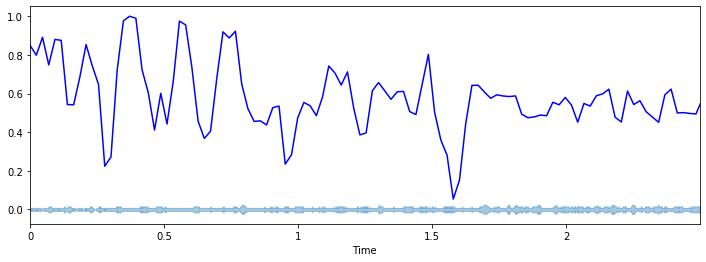

In [46]:
x=x
sr=sr

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape


# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

nx=normalize(spectral_centroids)
print(len(nx))
print(nx)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

### 2. Spectral Rolloff/ Bandwidth

216
[0.62923249 0.62773078 0.91068986 0.99400308 0.64886067 0.30222476
 0.03267918 0.57617161 0.75763566 0.80090893 0.34991625 0.19592843
 0.03220732 0.42260092 0.56557536 0.89160041 0.77801187 0.84035885
 0.81037469 0.83011811 0.66608515 1.         0.76418908 0.30657999
 0.59259332 0.6101237  0.39782336 0.28055698 0.03654407 0.
 0.41905049 0.7285031  0.68805982 0.76387684 0.47263324 0.44331069
 0.62100346 0.48021404 0.31962309 0.41121744 0.51368893 0.32656121
 0.31316519 0.46240222 0.44662782 0.38684236 0.47619798 0.36262005
 0.33671545 0.42775368 0.3171137  0.4632982  0.38649001 0.27534645
 0.36868675 0.47291051 0.57881965 0.53810478 0.42191633 0.54851397
 0.31720346 0.24028182 0.31399173 0.54882737 0.46672796 0.3927688
 0.25663612 0.14807625 0.02685346 0.05689857 0.36474492 0.49195748
 0.4800846  0.35987082 0.39311764 0.41399463 0.49373447 0.34560813
 0.31613938 0.31986129 0.49695824 0.40916184 0.27479127 0.41140378
 0.58050344 0.57979368 0.12898978 0.17964702 0.39224976 0.56157972


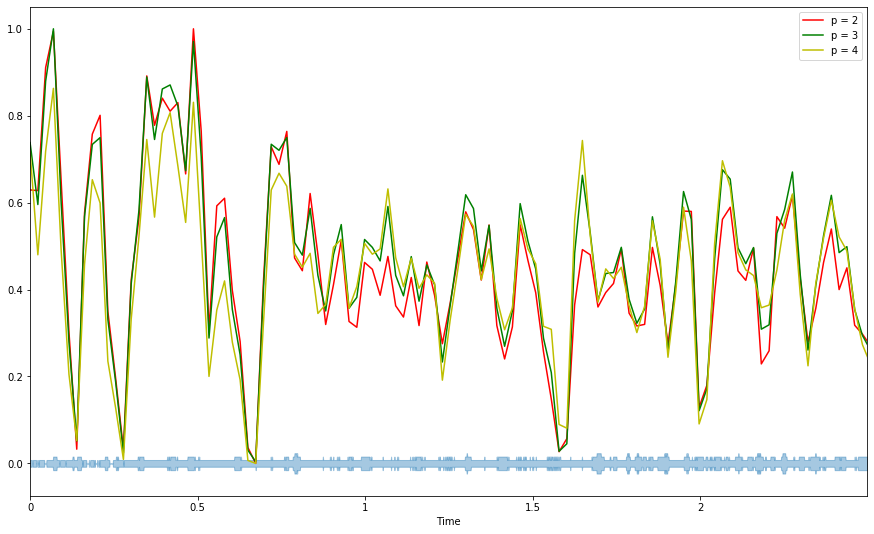

In [49]:
x=x
sr=sr

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]

srx = normalize(spectral_bandwidth_2)
print(len(srx))
print(srx)


plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

### 3. Zero-Crossing Rate

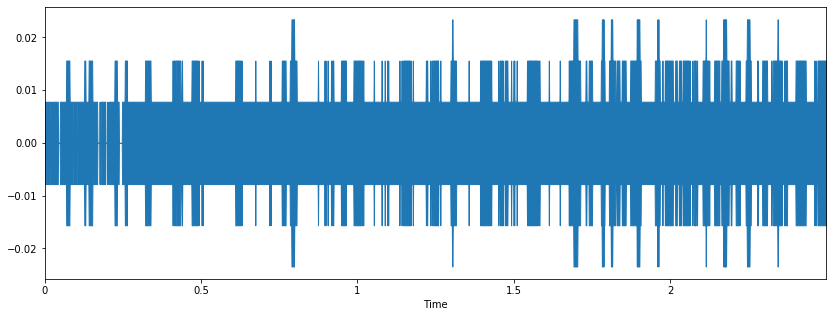

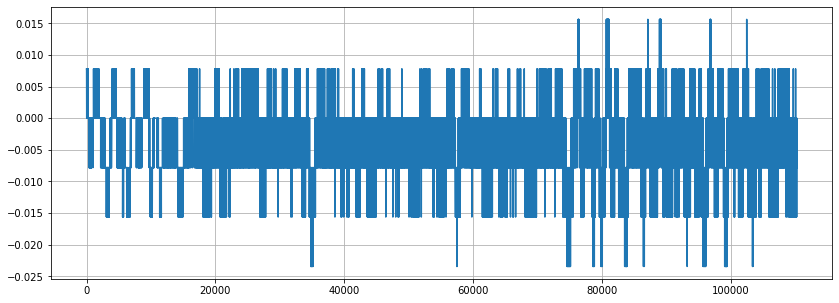

In [52]:
x=x
sr=sr

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
#plt.plot(x[n0:n1])
plt.plot(x)
plt.grid()

## Prepare a training Dataset with Spectral Centroid

In [54]:
# Normalising the spectral centroid
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [64]:
x=x
sr=sr

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

nx=normalize(spectral_centroids)
#print(len(nx))
#print(nx)
all_spectral_centroids=[]
spectral_centroids_x = list(nx)
spectral_centroids_x.append(0)
all_spectral_centroids.append(spectral_centroids_x)
print(all_spectral_centroids)

columns=[]
for i in range(216):
    columns.append("SC"+str(i))
columns.append("SOURCE")
print(columns)

df = pd.DataFrame(columns=columns, data=all_spectral_centroids)

[[0.8489182490324194, 0.7983223055003945, 0.8908918345650885, 0.7480848965933546, 0.8801352400013625, 0.874973816406901, 0.5426634542304374, 0.541546634685147, 0.685693498546617, 0.8535143450775582, 0.7425702886624403, 0.6469604267145623, 0.22357099397911373, 0.271464762435631, 0.7223169739578545, 0.9762267558648627, 1.0, 0.9894820195968883, 0.7220946815180826, 0.6031740102732277, 0.41081137571072857, 0.6007945362998046, 0.4421779756689519, 0.6613537603513886, 0.9747136251039779, 0.9551116847585646, 0.7351768205396123, 0.45712697378618117, 0.36723503495462184, 0.40511173947952894, 0.6778219767920586, 0.9192030192369836, 0.8875258696045587, 0.9223202286663881, 0.6502626661994646, 0.5216315620245577, 0.4554952393080849, 0.4584314674944068, 0.43708005317773724, 0.5267422924703129, 0.5351328762190612, 0.23452275278818302, 0.28241854854036763, 0.4728617423999135, 0.5538641802880053, 0.5363149753132221, 0.4851479976537969, 0.5832821918746522, 0.7425832161076218, 0.7053744844535017, 0.6439088

In [88]:
deg0_files = []
deg90_files = []
deg180_files = []


directory = r'./data/data_v1/0_deg/'
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        deg0_files.append(os.path.join(directory, filename))
    else:
        continue
        
directory = r'./data/data_v1/90_deg/'
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        deg90_files.append(os.path.join(directory, filename))
    else:
        continue
        
directory = r'./data/data_v1/180_deg/'
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        deg180_files.append(os.path.join(directory, filename))
    else:
        continue
        

In [89]:
all_spectral_centroids=[]

for audio_file in deg0_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    nx=normalize(spectral_centroids)
    if len(nx)==216:
        spectral_centroids_x = list(nx)
        spectral_centroids_x.append(0)
        all_spectral_centroids.append(spectral_centroids_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)
    
for audio_file in deg90_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    nx=normalize(spectral_centroids)
    if len(nx)==216:
        spectral_centroids_x = list(nx)
        spectral_centroids_x.append(1)
        all_spectral_centroids.append(spectral_centroids_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)


for audio_file in deg180_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    nx=normalize(spectral_centroids)
    if len(nx)==216:
        spectral_centroids_x = list(nx)
        spectral_centroids_x.append(2)
        all_spectral_centroids.append(spectral_centroids_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)

Error in file length! LEN= 220 ./data/data_v1/90_deg/391 (2).wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/389.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/410.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/411.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/388.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/413.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/407.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/412.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/416.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/417.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/415.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/414.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/419.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/418.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/392.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/386.wav
Error in file length

In [90]:
columns=[]
for i in range(216):
    columns.append("SC"+str(i))
columns.append("SOURCE")

df_sc = pd.DataFrame(columns=columns, data=all_spectral_centroids)

In [91]:
df_sc.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,SC7,SC8,SC9,SC10,SC11,SC12,SC13,SC14,SC15,SC16,SC17,SC18,SC19,SC20,SC21,SC22,SC23,SC24,SC25,SC26,SC27,SC28,SC29,SC30,SC31,SC32,SC33,SC34,SC35,SC36,SC37,SC38,SC39,SC40,SC41,SC42,SC43,SC44,SC45,SC46,SC47,SC48,SC49,SC50,SC51,SC52,SC53,SC54,SC55,SC56,SC57,SC58,SC59,SC60,SC61,SC62,SC63,SC64,SC65,SC66,SC67,SC68,SC69,SC70,SC71,SC72,SC73,SC74,SC75,SC76,SC77,SC78,SC79,SC80,SC81,SC82,SC83,SC84,SC85,SC86,SC87,SC88,SC89,SC90,SC91,SC92,SC93,SC94,SC95,SC96,SC97,SC98,SC99,SC100,SC101,SC102,SC103,SC104,SC105,SC106,SC107,SC108,SC109,SC110,SC111,SC112,SC113,SC114,SC115,SC116,SC117,SC118,SC119,SC120,SC121,SC122,SC123,SC124,SC125,SC126,SC127,SC128,SC129,SC130,SC131,SC132,SC133,SC134,SC135,SC136,SC137,SC138,SC139,SC140,SC141,SC142,SC143,SC144,SC145,SC146,SC147,SC148,SC149,SC150,SC151,SC152,SC153,SC154,SC155,SC156,SC157,SC158,SC159,SC160,SC161,SC162,SC163,SC164,SC165,SC166,SC167,SC168,SC169,SC170,SC171,SC172,SC173,SC174,SC175,SC176,SC177,SC178,SC179,SC180,SC181,SC182,SC183,SC184,SC185,SC186,SC187,SC188,SC189,SC190,SC191,SC192,SC193,SC194,SC195,SC196,SC197,SC198,SC199,SC200,SC201,SC202,SC203,SC204,SC205,SC206,SC207,SC208,SC209,SC210,SC211,SC212,SC213,SC214,SC215,SOURCE
0,0.932762,0.955020,0.960288,1.000000,0.954787,0.898651,0.965310,0.975670,0.915079,0.880594,0.722632,0.500143,0.430063,0.436984,0.341034,0.241771,0.351351,0.377463,0.421551,0.542441,0.485258,0.532998,0.549770,0.476152,0.363305,0.317009,0.286926,0.335009,0.346862,0.297795,0.286617,0.226205,0.191474,0.199757,0.209643,0.204405,0.190333,0.200489,0.241927,0.182645,0.182034,0.230906,0.233176,0.177540,0.173559,0.171621,0.159322,0.173168,0.124754,0.085124,0.101070,0.120010,0.246856,0.192748,0.153867,0.145329,0.099795,0.071969,0.193161,0.209152,0.146724,0.170299,0.212549,0.248546,0.262666,0.229286,0.244050,0.302978,0.271409,0.235273,0.268136,0.329393,0.340091,0.320793,0.284642,0.307654,0.295826,0.306137,0.341343,0.369924,0.307245,0.344181,0.336243,0.330508,0.291490,0.339342,0.310275,0.273684,0.301408,0.302249,0.344121,0.311429,0.336033,0.336272,0.301268,0.302750,0.313539,0.277503,0.298273,0.322019,0.325816,0.310032,0.344618,0.317517,0.341123,0.374028,0.347831,0.328593,0.361409,0.380090,0.367437,0.356348,0.332965,0.324108,0.295589,0.345024,0.332432,0.334366,0.327578,0.321271,0.332186,0.329102,0.305619,0.342904,0.342956,0.334029,0.328067,0.324835,0.324173,0.348111,0.363141,0.307236,0.361117,0.380565,0.296412,0.252797,0.253124,0.258697,0.273203,0.329089,0.294260,0.285727,0.338897,0.317112,0.303495,0.233566,0.257244,0.279489,0.328647,0.329973,0.305093,0.265151,0.333505,0.327684,0.281602,0.299347,0.299860,0.268478,0.310137,0.360506,0.308116,0.290177,0.278868,0.231284,0.239949,0.318541,0.344947,0.324366,0.254205,0.269153,0.257985,0.282274,0.318458,0.297123,0.321807,0.318179,0.268929,0.264911,0.292831,0.334945,0.294254,0.285810,0.304599,0.276180,0.282361,0.315570,0.323824,0.336917,0.303065,0.335698,0.333027,0.329841,0.326998,0.343368,0.303994,0.308663,0.312689,0.300081,0.279370,0.308096,0.307420,0.299613,0.296851,0.284619,0.311228,0.296742,0.278036,0.289271,0.313516,0.328330,0.337203,0.387075,0.372038,0.338193,0.279343,0.000000,0
1,0.838961,0.927353,0.929125,0.895558,0.993400,1.000000,0.949116,0.858599,0.943271,0.999471,0.965121,0.821826,0.544335,0.484795,0.351015,0.224684,0.322468,0.336376,0.213428,0.265882,0.419658,0.459711,0.521240,0.544714,0.475782,0.402243,0.531902,0.581477,0.535509,0.458114,0.356956,0.275807,0.332248,0.337796,0.342304,0.327263,0.308122,0.405027,0.344861,0.205234,0.327444,0.287722,0.356761,0.380049,0.220026,0.177884,0.288802,0.306852,0.318444,0.259229,0.263568,0.202767,0.185529,0.146548,0.198131,0.147004,0.167450,0.210692,0.126758,0.075755,0.168607,0.169253,0.246345,0.223621,0.095621,0.053470,0.068623,0.168476,0.100330,0.106912,0.122652,0.083060,0.139178,0.114222,0.078092,0.127538,0.128727,0.141372,0.149516,0.175402,0.166579,0.136986,0.045816,0.038089,0.165481,0.111569,0.049272,0.124467,0.128090,0.103088,0.139817,0.068810,0.122310,0.087543,0.177251,0

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 217 entries, SB0 to SOURCE
dtypes: float64(216), int64(1)
memory usage: 4.8 MB


In [93]:
df.shape

(2919, 217)

## Prepare a training Dataset with Spectral Rolloff

In [94]:
all_spectral_bandwidth=[]

for audio_file in deg0_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    nx=normalize(spectral_bandwidth)
    if len(nx)==216:
        spectral_bandwidth_x = list(nx)
        spectral_bandwidth_x.append(0)
        all_spectral_bandwidth.append(spectral_bandwidth_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)
    
for audio_file in deg90_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    nx=normalize(spectral_bandwidth)
    if len(nx)==216:
        spectral_bandwidth_x = list(nx)
        spectral_bandwidth_x.append(1)
        all_spectral_bandwidth.append(spectral_bandwidth_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)


for audio_file in deg180_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    nx=normalize(spectral_bandwidth)
    if len(nx)==216:
        spectral_bandwidth_x = list(nx)
        spectral_bandwidth_x.append(2)
        all_spectral_bandwidth.append(spectral_bandwidth_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)

Error in file length! LEN= 220 ./data/data_v1/90_deg/391 (2).wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/389.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/410.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/411.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/388.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/413.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/407.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/412.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/416.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/417.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/415.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/414.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/419.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/418.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/392.wav
Error in file length! LEN= 220 ./data/data_v1/90_deg/386.wav
Error in file length

In [95]:
columns=[]
for i in range(216):
    columns.append("SB"+str(i))
columns.append("SOURCE")

df_sb = pd.DataFrame(columns=columns, data=all_spectral_bandwidth)

In [96]:
df_sb.head()

,SB0,SB1,SB2,SB3,SB4,SB5,SB6,SB7,SB8,SB9,SB10,SB11,SB12,SB13,SB14,SB15,SB16,SB17,SB18,SB19,SB20,SB21,SB22,SB23,SB24,SB25,SB26,SB27,SB28,SB29,SB30,SB31,SB32,SB33,SB34,SB35,SB36,SB37,SB38,SB39,SB40,SB41,SB42,SB43,SB44,SB45,SB46,SB47,SB48,SB49,SB50,SB51,SB52,SB53,SB54,SB55,SB56,SB57,SB58,SB59,SB60,SB61,SB62,SB63,SB64,SB65,SB66,SB67,SB68,SB69,SB70,SB71,SB72,SB73,SB74,SB75,SB76,SB77,SB78,SB79,SB80,SB81,SB82,SB83,SB84,SB85,SB86,SB87,SB88,SB89,SB90,SB91,SB92,SB93,SB94,SB95,SB96,SB97,SB98,SB99,SB100,SB101,SB102,SB103,SB104,SB105,SB106,SB107,SB108,SB109,SB110,SB111,SB112,SB113,SB114,SB115,SB116,SB117,SB118,SB119,SB120,SB121,SB122,SB123,SB124,SB125,SB126,SB127,SB128,SB129,SB130,SB131,SB132,SB133,SB134,SB135,SB136,SB137,SB138,SB139,SB140,SB141,SB142,SB143,SB144,SB145,SB146,SB147,SB148,SB149,SB150,SB151,SB152,SB153,SB154,SB155,SB156,SB157,SB158,SB159,SB160,SB161,SB162,SB163,SB164,SB165,SB166,SB167,SB168,SB169,SB170,SB171,SB172,SB173,SB174,SB175,SB176,SB177,SB178,SB179,SB180,SB181,SB182,SB183,SB184,SB185,SB186,SB187,SB188,SB189,SB190,SB191,SB192,SB193,SB194,SB195,SB196,SB197,SB198,SB199,SB200,SB201,SB202,SB203,SB204,SB205,SB206,SB207,SB208,SB209,SB210,SB211,SB212,SB213,SB214,SB215,SOURCE
0,0.000000,0.021763,0.112144,0.163466,0.194109,0.264304,0.254992,0.162701,0.012145,0.071983,0.518384,0.727388,0.670165,0.862486,0.960496,0.935136,0.954908,0.771571,0.726386,0.806465,0.695089,0.619067,0.678365,0.706034,0.735478,0.687243,0.786216,0.929176,0.965393,0.854178,0.812496,0.818253,0.755756,0.719817,0.741441,0.729810,0.715153,0.711941,0.901064,0.795900,0.679066,0.803905,0.836078,0.803213,0.836544,0.817163,0.835083,0.864752,0.729003,0.712293,0.719997,0.796917,1.000000,0.961565,0.917227,0.874023,0.808138,0.816214,0.896566,0.847737,0.790217,0.765495,0.833406,0.873283,0.826556,0.675369,0.691052,0.816494,0.733662,0.603273,0.759534,0.830837,0.826508,0.815536,0.731040,0.824843,0.816310,0.810472,0.848906,0.913585,0.800633,0.814048,0.792694,0.825153,0.761757,0.831980,0.722166,0.555912,0.635519,0.621654,0.744851,0.706396,0.860502,0.894081,0.815152,0.766740,0.735756,0.678614,0.732266,0.813070,0.760819,0.765419,0.854518,0.736606,0.764075,0.881408,0.880236,0.797757,0.865582,0.997620,0.944406,0.914443,0.879667,0.779815,0.680396,0.802240,0.772676,0.729840,0.828974,0.815221,0.830459,0.796261,0.826085,0.979007,0.888656,0.878472,0.843592,0.769147,0.798452,0.912388,0.902506,0.788385,0.869890,0.905485,0.759945,0.692546,0.696030,0.732074,0.731057,0.740054,0.710508,0.721814,0.867117,0.836415,0.782606,0.612025,0.741855,0.718875,0.725365,0.779675,0.802193,0.712624,0.788353,0.805348,0.748301,0.805047,0.847720,0.784068,0.783703,0.820308,0.743464,0.743015,0.696939,0.638840,0.698744,0.789183,0.759199,0.844463,0.757955,0.789990,0.783500,0.770256,0.811481,0.856209,0.894055,0.838318,0.746209,0.685448,0.779559,0.773933,0.762660,0.853142,0.833787,0.746714,0.684596,0.740683,0.834522,0.905639,0.727074,0.851120,0.846076,0.920487,0.895514,0.860926,0.720384,0.713675,0.790600,0.800776,0.652072,0.732242,0.785239,0.815433,0.698404,0.604430,0.716430,0.635379,0.670470,0.722129,0.775573,0.739653,0.711628,0.904772,0.886342,0.791980,0.797994,0.784191,0
1,0.283427,0.240800,0.095520,0.099651,0.000000,0.025319,0.006021,0.038283,0.108391,0.158702,0.019358,0.252895,0.726002,0.863087,0.600658,0.643678,0.963491,0.915947,0.554836,0.731508,0.779721,0.824816,0.909050,0.854349,0.697968,0.632671,0.742579,0.886230,0.767205,0.567214,0.570700,0.704937,0.590358,0.608849,0.706332,0.685153,0.759556,0.750393,0.589508,0.566578,0.770736,0.869008,0.876192,0.894551,0.862241,0.813138,0.869827,0.852442,0.850544,0.852453,0.811774,0.792206,0.817594,0.804464,0.924388,0.768120,0.812266,0.971645,0.869046,0.779085,0.904292,0.880235,0.899192,0.997763,0.826531,0.740017,0.744248,0.738777,0.652781,0.848156,0.856319,0.744555,0.865936,0.821161,0.723300,0.839858,0.940280,0.858878,0.783960,0.794103,0.712979,0.769969,0.683326,0.734654,0.824784,0.726765,0.670405,0.803925,0.872277,0.686867,0.715199,0.769672,0.868478,0.802258,0.750581,0

In [97]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 217 entries, SB0 to SOURCE
dtypes: float64(216), int64(1)
memory usage: 4.8 MB


In [98]:
df_sb.shape

(2919, 217)

In [4]:
x , sr = librosa.load(audio_filepaths[0])

In [5]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [6]:
print(x)

[ 1.6846365e-04 -1.1225329e-04  6.4815567e-06 ... -4.6442286e-04
  8.0277491e-04 -2.4706419e-03]


In [7]:
print(len(x))

55125


In [8]:
print(sr)

22050


In [12]:
x , sr_44 = librosa.load(audio_filepaths[0], sr=44100)

In [13]:
print(x)

[ 0.         0.         0.        ...  0.         0.        -0.0078125]


In [14]:
print(sr_44)

44100


# Test Play files

In [16]:
ipd.Audio(audio_filepaths[0])

# Visualize the Audio

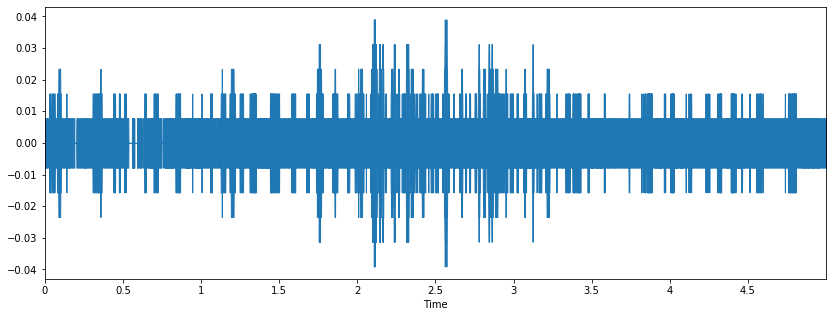

In [17]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [18]:
audio_meta = {}
file_index=1
for audio_file in audio_filepaths:
    x,sr = librosa.load(audio_file, sr=44100)
    audio_meta[file_index] = {'x':x,'sr':sr}
    file_index+=1

In [19]:
audio_meta

{1: {'x': array([ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         -0.0078125], dtype=float32), 'sr': 44100},
 2: {'x': array([ 0.       ,  0.       ,  0.       , ..., -0.0078125, -0.0078125,
         -0.0078125], dtype=float32),
  'sr': 44100},
 3: {'x': array([ 0.      ,  0.      ,  0.      , ..., -0.015625, -0.015625,
         -0.015625], dtype=float32), 'sr': 44100},
 4: {'x': array([-0.015625, -0.015625, -0.015625, ..., -0.015625, -0.015625,
         -0.015625], dtype=float32), 'sr': 44100},
 5: {'x': array([-0.015625 , -0.015625 , -0.015625 , ...,  0.       , -0.0078125,
          0.       ], dtype=float32), 'sr': 44100},
 6: {'x': array([-0.0078125,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ], dtype=float32), 'sr': 44100},
 7: {'x': array([ 0.0078125,  0.0078125,  0.       , ...,  0.       , -0.0078125,
         -0.0078125], dtype=float32), 'sr': 44100},
 8: {'x': array([0.       , 0.0078125, 0.0078125, ..., 0.       , 0.    

In [20]:
for a_meta in audio_meta.keys():
    print(audio_meta[a_meta]['sr'],audio_meta[a_meta]['x'])

44100 [ 0.         0.         0.        ...  0.         0.        -0.0078125]
44100 [ 0.         0.         0.        ... -0.0078125 -0.0078125 -0.0078125]
44100 [ 0.        0.        0.       ... -0.015625 -0.015625 -0.015625]
44100 [-0.015625 -0.015625 -0.015625 ... -0.015625 -0.015625 -0.015625]
44100 [-0.015625  -0.015625  -0.015625  ...  0.        -0.0078125  0.       ]
44100 [-0.0078125  0.         0.        ...  0.         0.         0.       ]
44100 [ 0.0078125  0.0078125  0.        ...  0.        -0.0078125 -0.0078125]
44100 [0.        0.0078125 0.0078125 ... 0.        0.        0.       ]
44100 [0.        0.        0.        ... 0.        0.0078125 0.       ]
44100 [ 0.        -0.0078125  0.        ...  0.         0.         0.       ]
44100 [ 0.        -0.0078125 -0.0078125 ...  0.0078125  0.0078125  0.0078125]
44100 [-0.0078125  0.         0.        ...  0.0078125  0.0078125  0.0078125]
44100 [-0.0078125  0.         0.        ...  0.0078125  0.0078125  0.0078125]
44100 [-0.

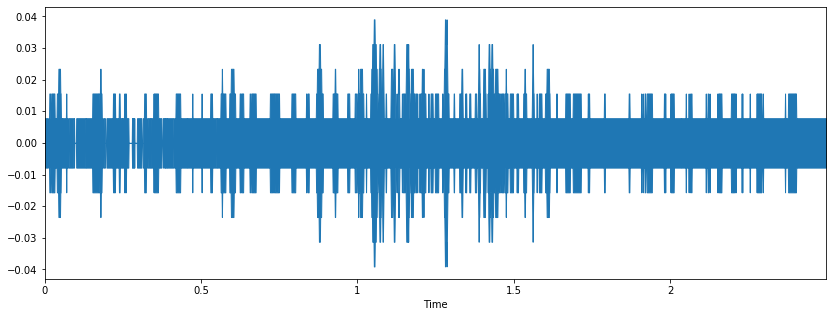

In [21]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_meta[1]['x'], sr=audio_meta[1]['sr'])

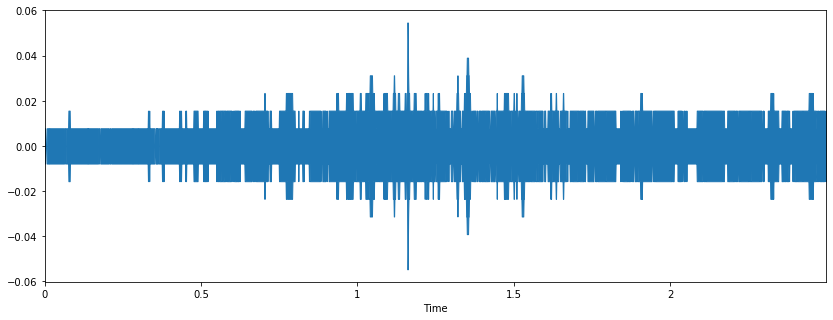

In [22]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_meta[2]['x'], sr=audio_meta[2]['sr'])

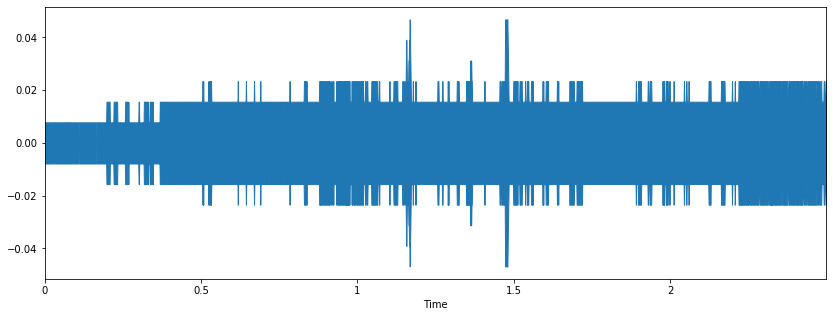

In [23]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_meta[3]['x'], sr=audio_meta[3]['sr'])

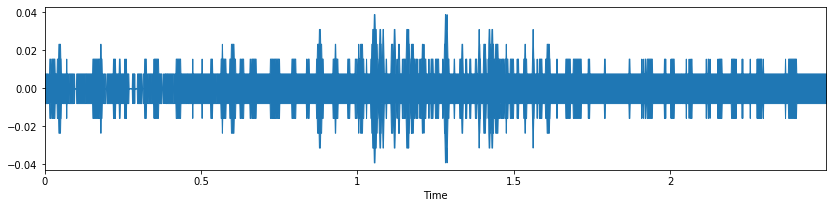

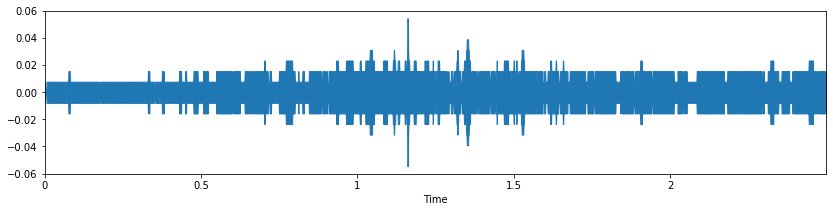

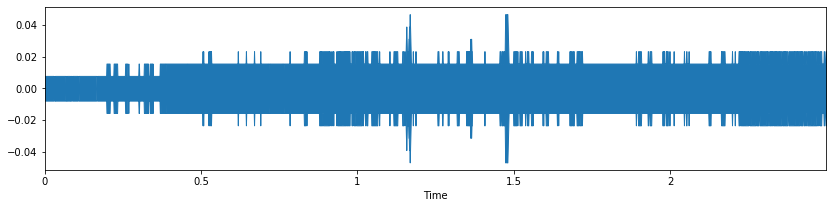

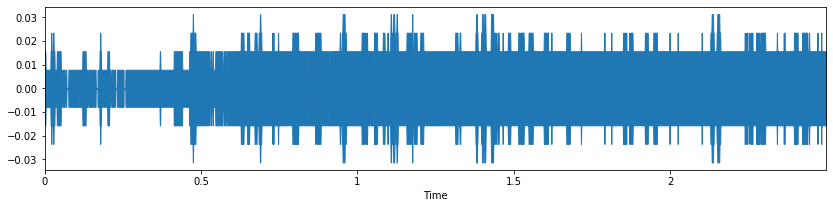

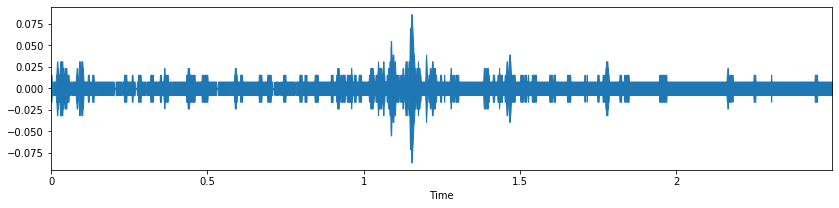

In [24]:
for i in range(1,6):
    plt.figure(figsize=(14, 3))
    librosa.display.waveplot(audio_meta[i]['x'], sr=audio_meta[i]['sr'])

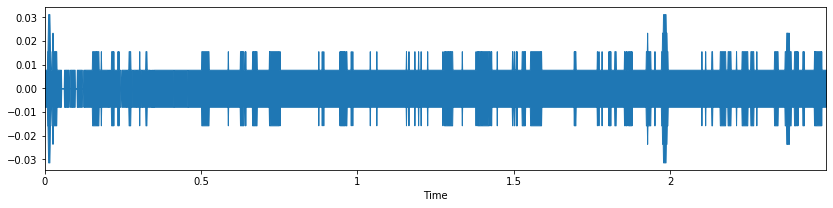

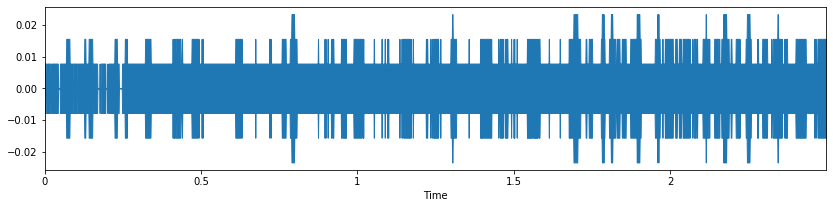

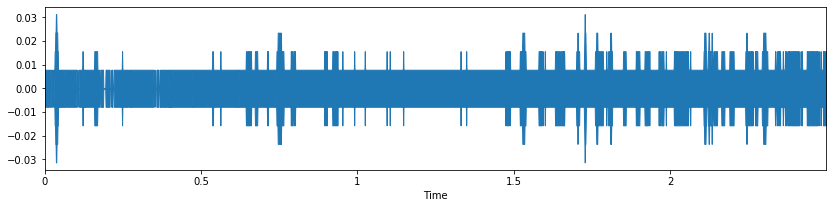

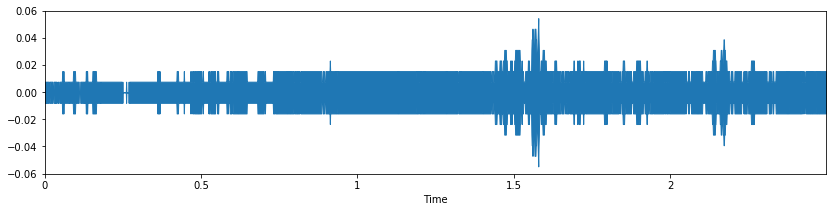

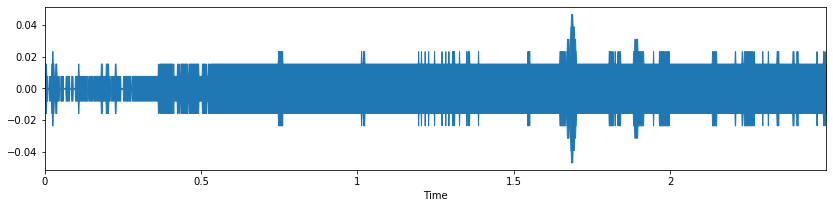

In [25]:
for i in range(6,11):
    plt.figure(figsize=(14, 3))
    librosa.display.waveplot(audio_meta[i]['x'], sr=audio_meta[i]['sr'])

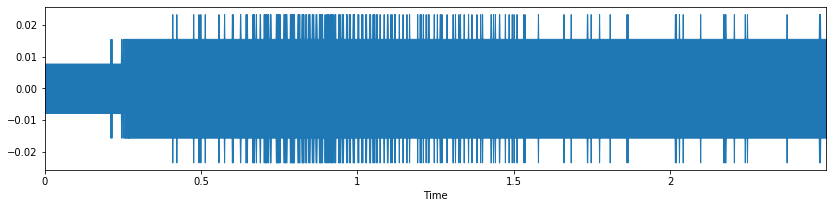

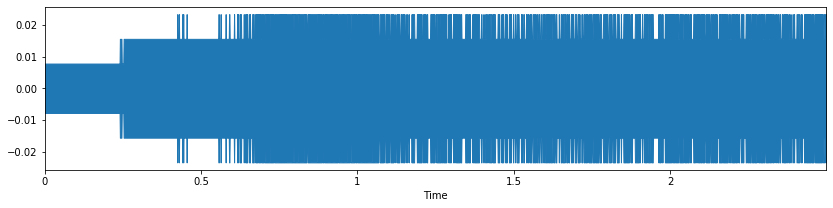

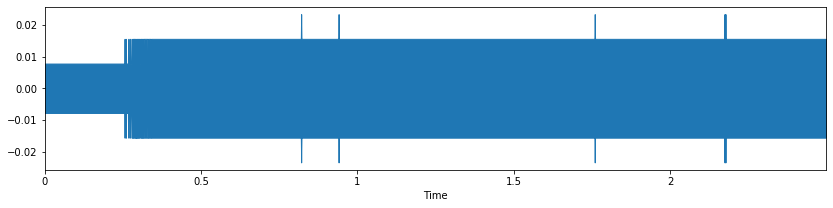

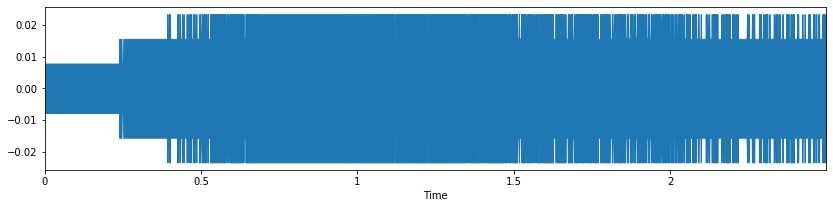

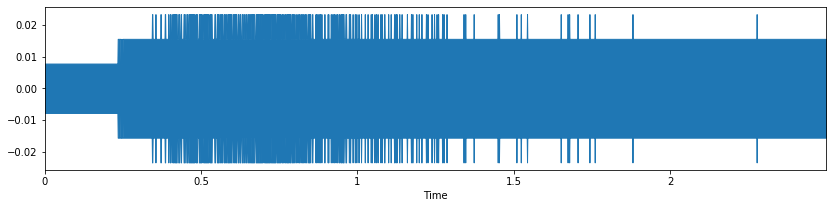

In [26]:
for i in range(11,16):
    plt.figure(figsize=(14, 3))
    librosa.display.waveplot(audio_meta[i]['x'], sr=audio_meta[i]['sr'])

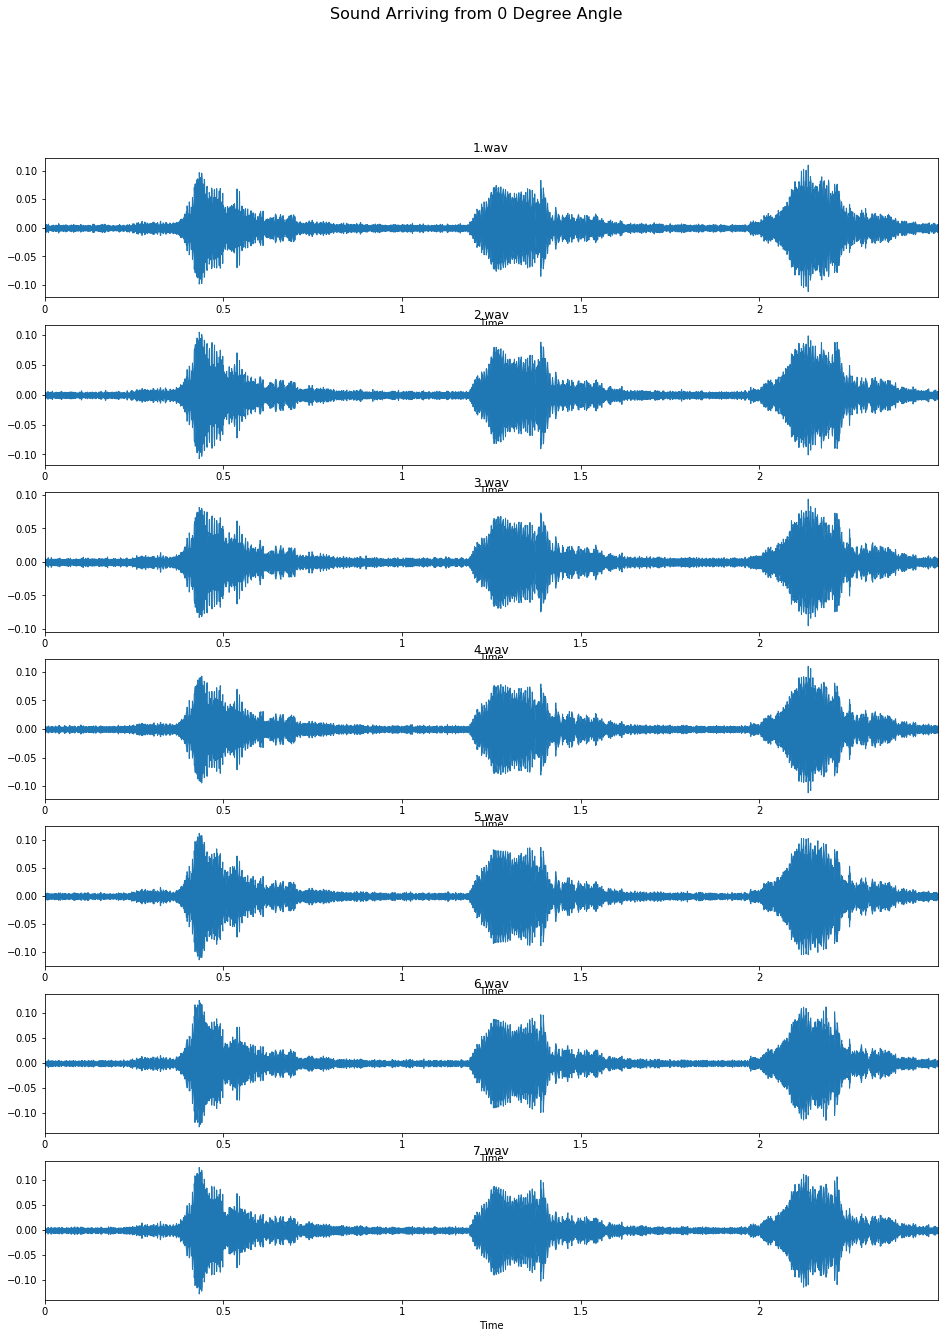

In [80]:
fig, ax = plt.subplots(7,1,figsize=(16,21))
fig.suptitle('Sound Arriving from 0 Degree Angle', fontsize=16)

for i in range(0,7):
    librosa.display.waveplot(audio_meta[i+1]['x'], sr=audio_meta[i+1]['sr'],ax=ax[i])
    ax[i].set_title(str(i+1)+'.wav')

plt.savefig("./output/sample28/01_07.png", bbox_inches='tight')

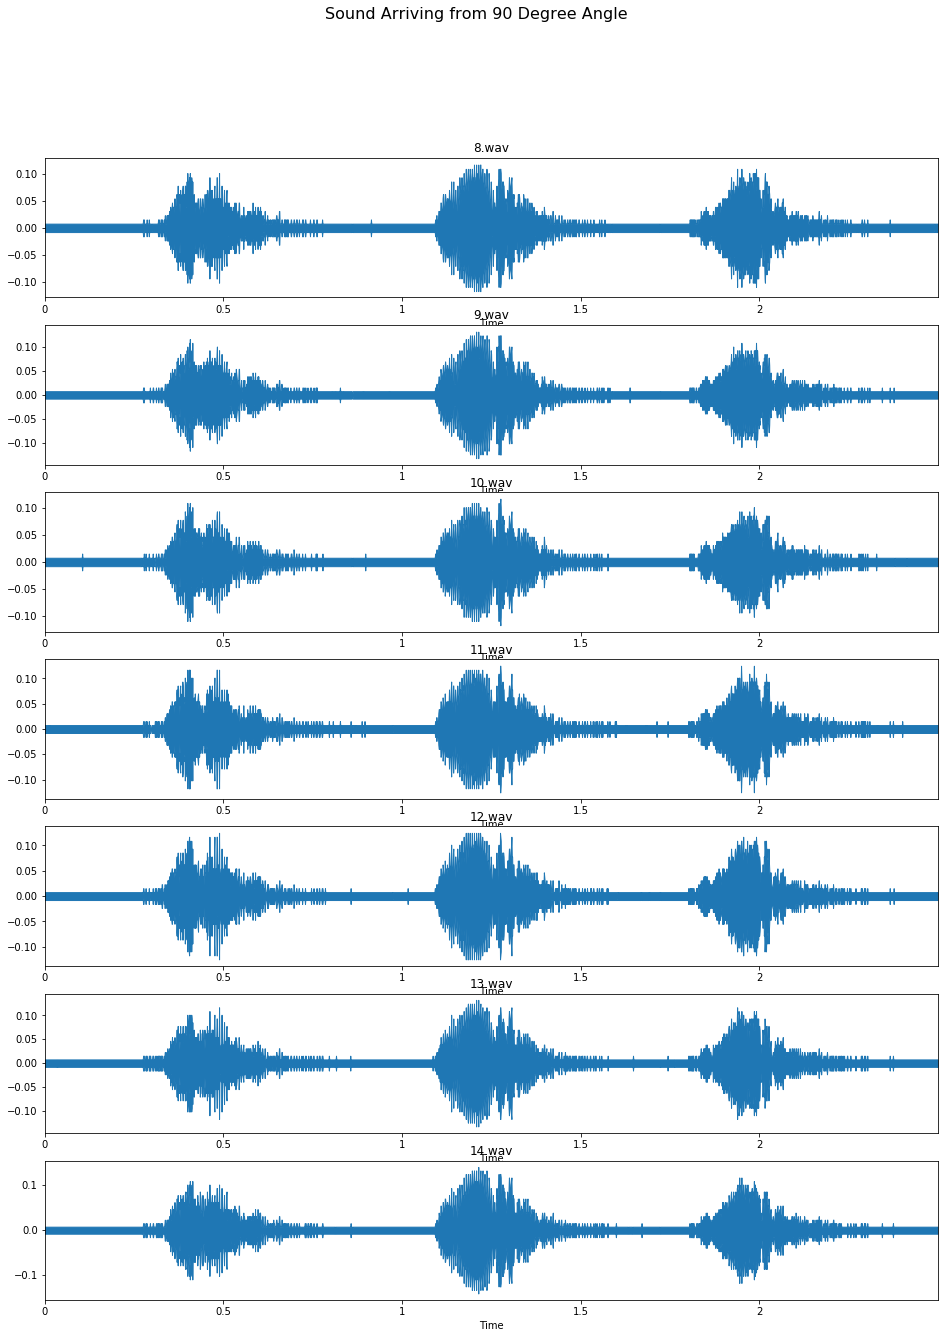

In [81]:
fig, ax = plt.subplots(7,1,figsize=(16,21))
fig.suptitle('Sound Arriving from 90 Degree Angle', fontsize=16)

for i in range(0,7):
    librosa.display.waveplot(audio_meta[i+8]['x'], sr=audio_meta[i+8]['sr'],ax=ax[i])
    ax[i].set_title(str(i+1+7)+'.wav')

plt.savefig("./output/sample28/08_14.png", bbox_inches='tight')

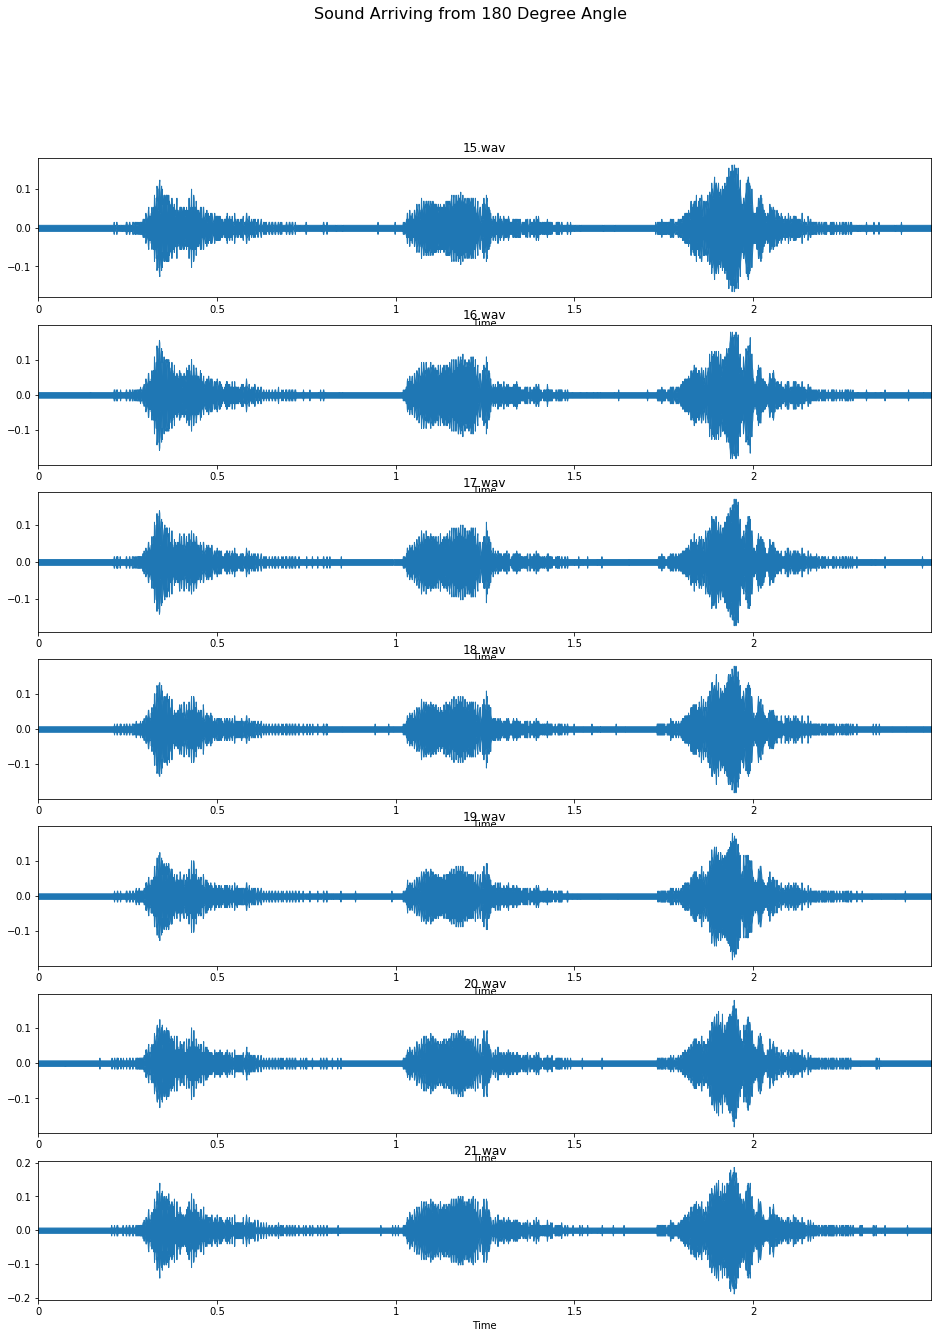

In [82]:
fig, ax = plt.subplots(7,1,figsize=(16,21))
fig.suptitle('Sound Arriving from 180 Degree Angle', fontsize=16)

for i in range(0,7):
    librosa.display.waveplot(audio_meta[i+15]['x'], sr=audio_meta[i+15]['sr'],ax=ax[i])
    ax[i].set_title(str(i+1+14)+'.wav')

plt.savefig("./output/sample28/15_21.png", bbox_inches='tight')

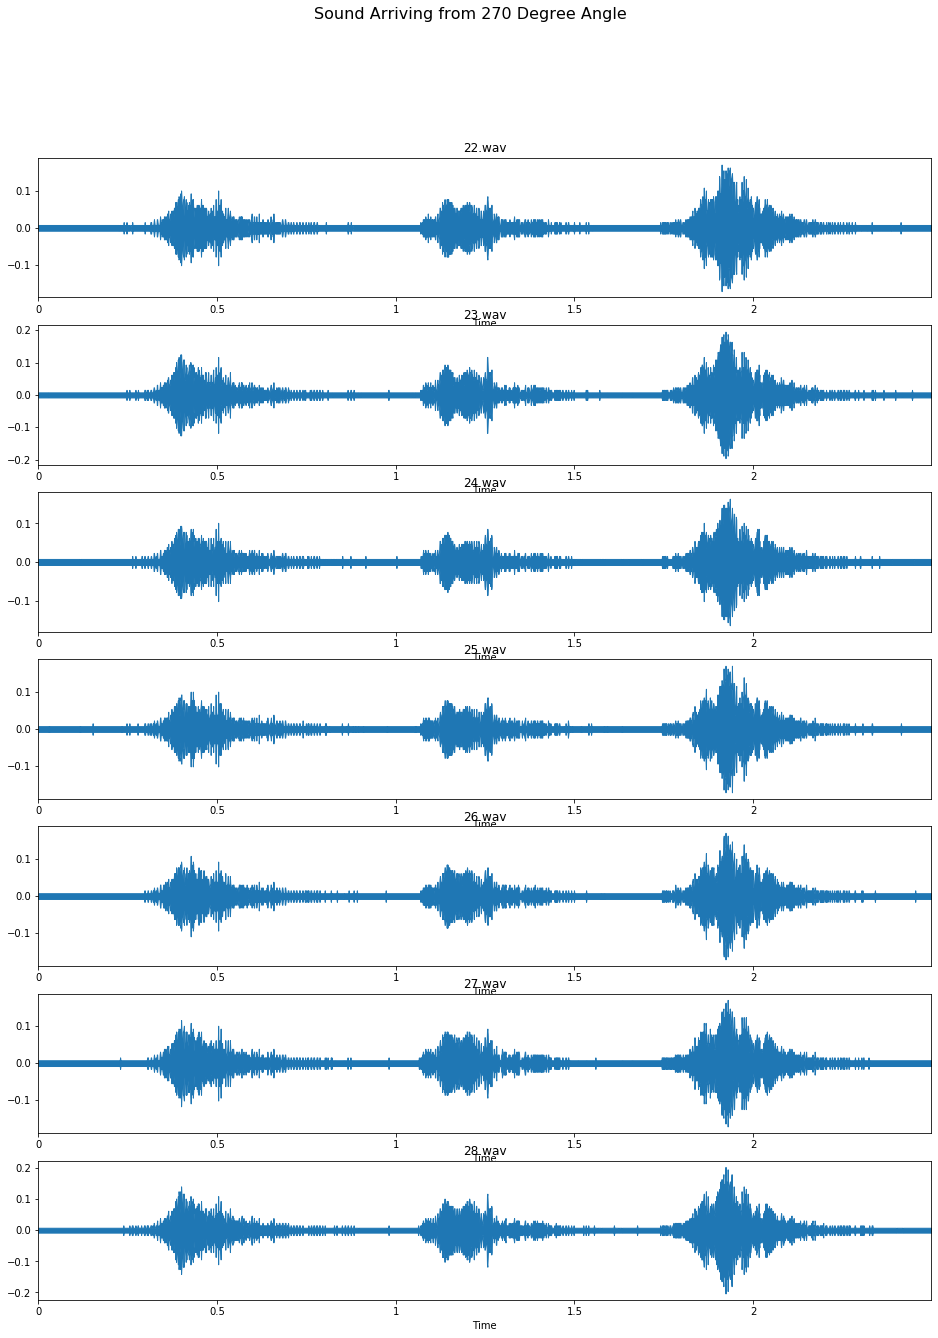

In [83]:
fig, ax = plt.subplots(7,1,figsize=(16,21))
fig.suptitle('Sound Arriving from 270 Degree Angle', fontsize=16)

for i in range(0,7):
    librosa.display.waveplot(audio_meta[i+22]['x'], sr=audio_meta[i+22]['sr'],ax=ax[i])
    ax[i].set_title(str(i+22)+'.wav')

plt.savefig("./output/sample28/22_28.png", bbox_inches='tight')

In [79]:
for i in range(1,29):
    print(i,str(len(audio_meta[i]['x'])))
    

1 110250
2 110250
3 110250
4 110250
5 110250
6 110250
7 110250
8 110250
9 110250
10 110250
11 110250
12 110250
13 110250
14 110250
15 110250
16 110250
17 110250
18 110250
19 110250
20 110250
21 110250
22 110250
23 110250
24 110250
25 110250
26 110250
27 110250
28 110250


# Spectrogram

In [27]:
x=audio_meta[0]['x']
sr=audio_meta[0]['sr']

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

KeyError: 0

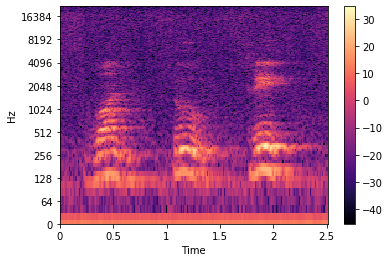

In [89]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Feature extraction from Audio signal

## 1. Spectral Centroid

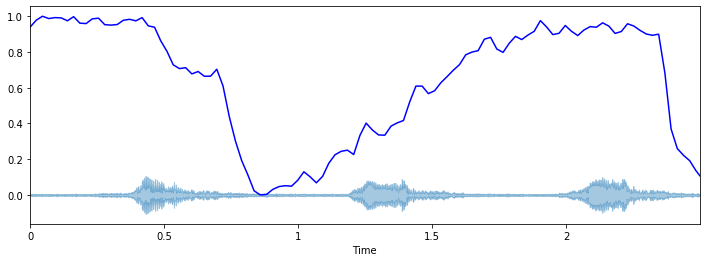

In [95]:
x=audio_meta[2]['x']
sr=audio_meta[2]['sr']

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape


# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

## 2. Spectral Rolloff

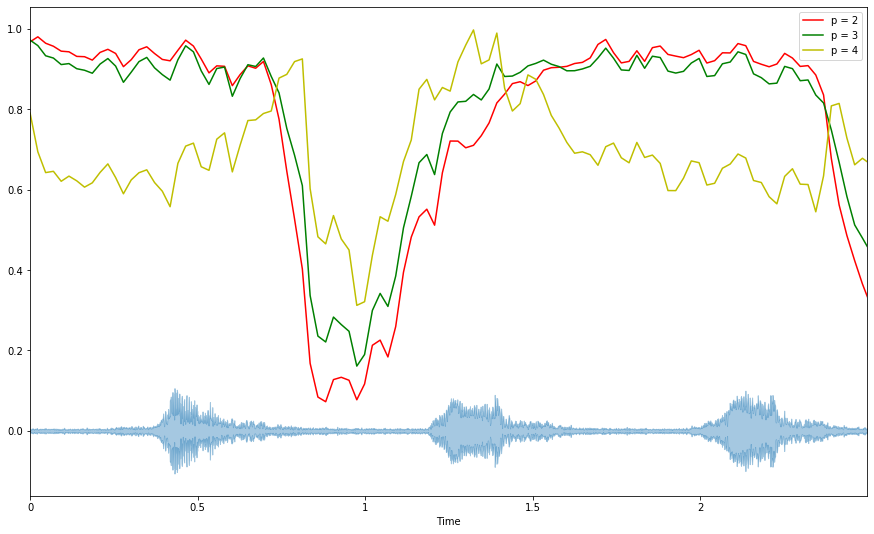

In [97]:
x=audio_meta[2]['x']
sr=audio_meta[2]['sr']

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## 4. Zero-Crossing Rate

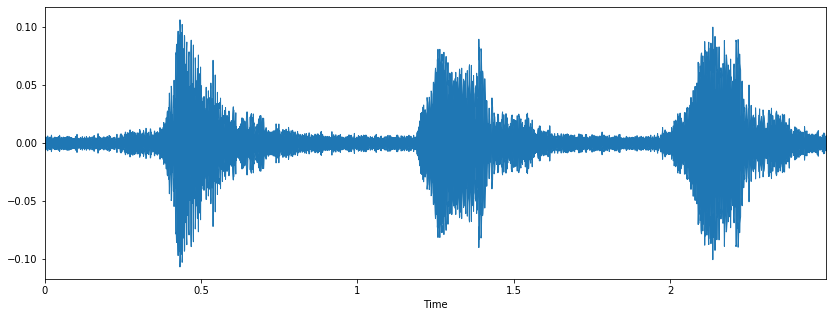

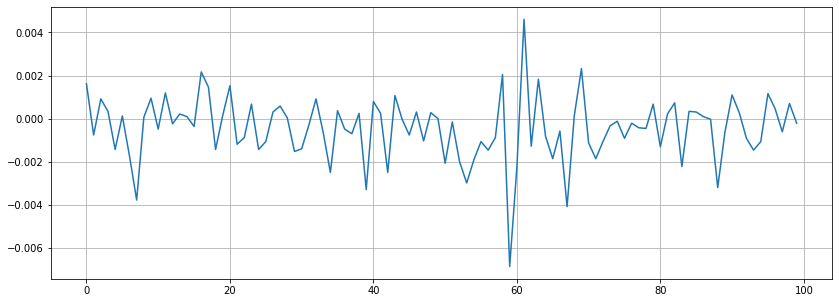

In [98]:
x=audio_meta[2]['x']
sr=audio_meta[2]['sr']

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [99]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

53


## 5. Mel-Frequency Cepstral Coefficients(MFCCs)

(20, 216)


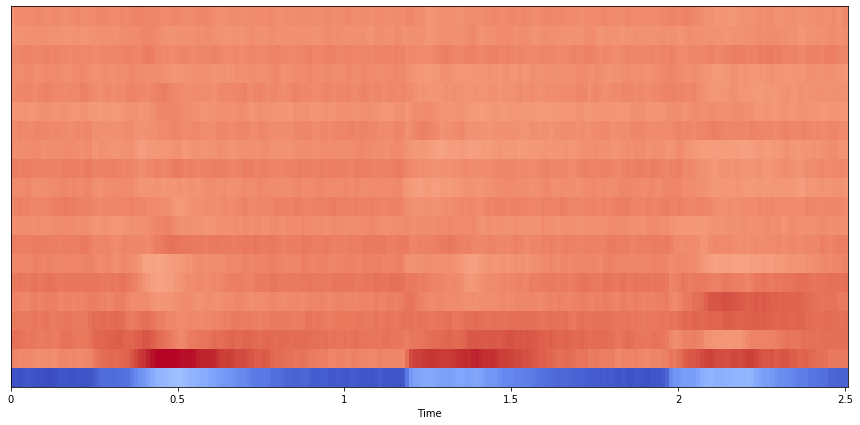

In [100]:
x=audio_meta[2]['x']
sr=audio_meta[2]['sr']

mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## 6. Chroma feature

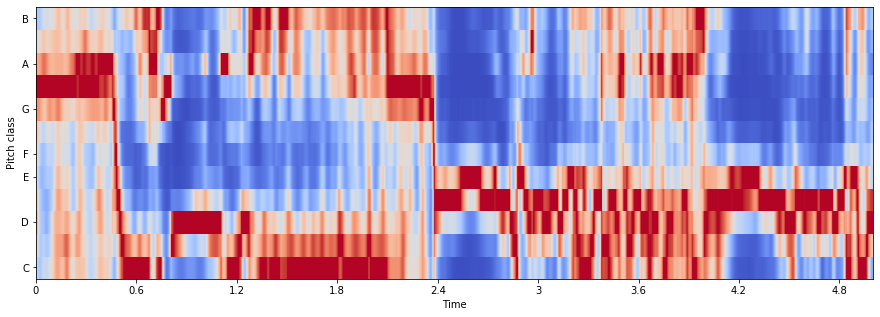

In [102]:
x=audio_meta[2]['x']
sr=audio_meta[2]['sr']
hop_length=12

chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')